In [62]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [63]:
file = pd.read_csv('mobile_price_range_data.csv')
data_main = file.copy()
data_main

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [64]:
indices_to_select = np.random.choice(data_main.index, size=1600, replace=False)
data = data_main.loc[indices_to_select]
data_main = data_main.drop(indices_to_select)

In [65]:
data_main["blue"].std()

0.5005260390723666

In [68]:
for i in range(20):
    mean = data.iloc[:, i].mean()
    std = data.iloc[:, i].std()
    for j in range(len(data)):
        data.iloc[j, i] = (data.iloc[j, i] - mean)/std

In [94]:
for i in range(20):
    mean = data_main.iloc[:, i].mean()
    std = data_main.iloc[:, i].std()
    for j in range(len(data_main)):
        data_main.iloc[j, i] = (data_main.iloc[j, i] - mean)/std

In [95]:
(data["battery_power"]-data["battery_power"].mean())/data["battery_power"].std()

1613    -0.164477
1577    -0.831640
148     -0.617099
1702    -0.412287
1557    -0.620282
          ...    
1024     4.958854
1337     6.570550
1296    10.590245
1772    13.469829
1197    16.670056
Name: battery_power, Length: 1600, dtype: float64

In [96]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1613,-0.164477,-1.614989,-0.538386,-1.664378,-0.808461,-1.683599,-0.470009,-2.216701,-0.619422,-1.983627,...,-0.997252,-0.682071,-0.391505,-0.558123,-0.235837,-1.539114,0.275636,-1.632294,0.984066,2
1577,-0.831640,-1.610131,-0.398794,-1.659167,-0.204112,-1.678245,-0.131177,0.117968,-0.793297,-1.981285,...,-0.535260,0.089020,-0.740985,-1.668771,-1.458310,-1.067643,-3.081036,1.010177,-1.661888,1
148,-0.617099,-1.605330,1.400080,-1.654020,-0.505573,-1.672958,-0.186983,-1.038522,0.104504,-1.277365,...,0.676279,0.086018,-0.485005,-0.715690,-0.693738,-1.536170,-3.051504,1.010194,0.982456,2
1702,-0.412287,1.027092,1.264710,0.978115,-1.108860,-1.667737,-0.946695,0.120070,-0.150057,-0.575220,...,-0.950227,-0.676541,-0.336054,-0.398841,-1.456956,0.224237,0.268185,-1.627313,-1.656693,2
1557,-0.620282,1.027080,-1.087938,-1.648934,-1.108665,-1.662582,-0.720988,-1.610463,-0.814339,-1.624091,...,-1.069889,-0.909386,-0.300661,-1.816697,-1.303878,-0.360958,-3.022446,1.008594,-1.651564,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,4.958854,1.051554,-0.749044,-0.723576,3.142510,-0.732037,7.842476,-0.934590,8.506311,1.868265,...,8.072775,5.321300,3.198714,4.749345,4.358850,3.855210,-1.269691,1.039708,-0.723181,0
1337,6.570550,-0.701691,0.518319,-0.723180,0.550866,-0.731634,5.342286,-0.086649,6.265218,1.230749,...,8.663515,8.449028,6.898085,2.170030,2.174495,5.862558,-1.268709,-0.709741,-0.722784,2
1296,10.590245,-0.701309,2.166343,-0.722783,-0.756564,1.022264,7.019713,1.607978,9.188402,3.814120,...,4.892590,6.353738,8.747935,1.739044,0.835662,6.422581,0.774597,-0.709354,-0.722389,2
1772,13.469829,-0.700928,-0.114119,1.030097,-0.756406,1.022242,11.373690,-0.933712,8.111416,0.597602,...,1.319408,13.205757,13.550780,1.749378,0.387275,1.694700,0.774806,1.039993,1.028616,3


In [97]:
data["battery_power"].mean()

-3.552713678800501e-17

In [98]:
data.iloc[:, 0].max()

16.670055920468698

In [99]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1613,-0.164477,-1.614989,-0.538386,-1.664378,-0.808461,-1.683599,-0.470009,-2.216701,-0.619422,-1.983627,...,-0.997252,-0.682071,-0.391505,-0.558123,-0.235837,-1.539114,0.275636,-1.632294,0.984066,2
1577,-0.831640,-1.610131,-0.398794,-1.659167,-0.204112,-1.678245,-0.131177,0.117968,-0.793297,-1.981285,...,-0.535260,0.089020,-0.740985,-1.668771,-1.458310,-1.067643,-3.081036,1.010177,-1.661888,1
148,-0.617099,-1.605330,1.400080,-1.654020,-0.505573,-1.672958,-0.186983,-1.038522,0.104504,-1.277365,...,0.676279,0.086018,-0.485005,-0.715690,-0.693738,-1.536170,-3.051504,1.010194,0.982456,2
1702,-0.412287,1.027092,1.264710,0.978115,-1.108860,-1.667737,-0.946695,0.120070,-0.150057,-0.575220,...,-0.950227,-0.676541,-0.336054,-0.398841,-1.456956,0.224237,0.268185,-1.627313,-1.656693,2
1557,-0.620282,1.027080,-1.087938,-1.648934,-1.108665,-1.662582,-0.720988,-1.610463,-0.814339,-1.624091,...,-1.069889,-0.909386,-0.300661,-1.816697,-1.303878,-0.360958,-3.022446,1.008594,-1.651564,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,4.958854,1.051554,-0.749044,-0.723576,3.142510,-0.732037,7.842476,-0.934590,8.506311,1.868265,...,8.072775,5.321300,3.198714,4.749345,4.358850,3.855210,-1.269691,1.039708,-0.723181,0
1337,6.570550,-0.701691,0.518319,-0.723180,0.550866,-0.731634,5.342286,-0.086649,6.265218,1.230749,...,8.663515,8.449028,6.898085,2.170030,2.174495,5.862558,-1.268709,-0.709741,-0.722784,2
1296,10.590245,-0.701309,2.166343,-0.722783,-0.756564,1.022264,7.019713,1.607978,9.188402,3.814120,...,4.892590,6.353738,8.747935,1.739044,0.835662,6.422581,0.774597,-0.709354,-0.722389,2
1772,13.469829,-0.700928,-0.114119,1.030097,-0.756406,1.022242,11.373690,-0.933712,8.111416,0.597602,...,1.319408,13.205757,13.550780,1.749378,0.387275,1.694700,0.774806,1.039993,1.028616,3


In [100]:
data.iloc[:, -1].unique()

array([2, 1, 3, 0], dtype=int64)

In [101]:
price_0 = data[data['price_range'] == 0]
dic = {}
cluster = []
for i in range(4):
    for j in range(20):
        cluster.append(data[data['price_range'] == i].iloc[:, j].mean())
    dic[i] = cluster
    cluster = []

In [102]:
dic

{0: [-0.12470976016968018,
  -0.015324488003407653,
  0.033270320533844995,
  -0.007994103601177867,
  -0.022539830601270974,
  -0.0011245715024878293,
  -0.02946905705936583,
  -0.027500592948499387,
  -0.011230841386229966,
  0.03564554283235308,
  -0.046386032672685214,
  -0.12890684282503598,
  -0.09904287213951123,
  -0.5703457688339038,
  -0.008428841700807783,
  -0.017062743796390206,
  -0.05512171953628005,
  -0.011907558315303563,
  0.01892311610654353,
  -0.013712341822744207],
 1: [-0.004956092175524885,
  -0.015809515699018808,
  -0.049749531260750365,
  -0.024113114082013432,
  -0.019425084861910753,
  -0.0015182416613616846,
  -0.019026628790163196,
  0.0486638116387471,
  0.005268317091003027,
  -0.11373803506762785,
  0.006027433101078382,
  0.02168162597027319,
  0.00031185050739851753,
  -0.1838320053775485,
  -0.03378137874443507,
  -0.045935053180023576,
  0.012091594933666088,
  0.002645235807182325,
  0.04676478404973783,
  -0.002676619423747968],
 2: [0.004126234

In [103]:
def distance(row, cluster):
    dist = 0
    for i in range(20):
        dist += (row[i] - cluster[i])**2
    return math.sqrt(dist)

In [104]:
def dist_point_name(row):
    dict_dist = {}
    for i in range(4):
        dict_dist[float(i)] = distance(row, dic[i])
    return list(dict_dist.keys())[list(dict_dist.values()).index(min(dict_dist.values()))]

In [105]:
dist_point_name(data.iloc[1])

1.0

In [106]:
indices_to_select = np.random.choice(data_main.index, size=400, replace=False)
test_points = data_main.loc[indices_to_select]

In [107]:
test_points

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1192,-0.475872,1.018928,-1.246454,-1.003756,-0.046775,0.921804,0.216047,0.684836,0.108606,-1.549935,...,-0.341624,-1.603959,0.646831,-1.056771,0.059344,0.150872,0.565094,-1.013845,1.013845,2
528,0.969325,-0.978970,-1.125791,0.993768,0.663733,0.921804,1.530399,-1.374821,-0.391050,-1.111481,...,-0.871598,-0.904840,0.212974,-0.577238,-0.415410,-0.760740,0.565094,-1.013845,-0.983879,2
375,-1.050795,1.018928,1.287480,-1.003756,-0.994120,-1.082117,-0.167306,-0.344993,1.274470,1.080789,...,-0.213547,0.653464,0.387826,1.101128,2.433117,-0.396095,0.565094,-1.013845,1.013845,2
1890,1.690796,-0.978970,1.528807,-1.003756,-0.283611,0.921804,-0.988776,-1.374821,1.052401,-1.549935,...,-0.794310,-0.459947,-0.231169,-1.056771,-0.178033,1.062483,0.565094,0.983879,1.013845,1
849,0.101305,1.018928,0.925489,-1.003756,1.374241,0.921804,-0.934012,-1.374821,-1.251569,-1.111481,...,-1.412614,-1.342672,-1.574818,-0.577238,-0.178033,-1.307707,0.565094,0.983879,-0.983879,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,-0.442053,1.018928,-0.401810,0.993768,-0.283611,0.921804,0.380341,-1.374821,0.885849,0.642335,...,0.928107,0.780576,0.026901,-0.337471,0.534099,0.150872,0.565094,-1.013845,1.013845,2
127,0.728083,-0.978970,0.925489,-1.003756,-0.046775,0.921804,-0.441130,-0.001716,1.274470,0.642335,...,1.327796,1.724503,-0.572458,-1.536304,-0.415410,-0.760740,0.565094,0.983879,1.013845,1
696,0.241090,-0.978970,-0.281146,-1.003756,-0.994120,-1.082117,0.544635,-0.344993,-0.751913,0.203881,...,-1.001884,-1.721655,1.688463,-0.577238,-0.652788,-0.578417,0.565094,-1.013845,1.013845,3
1653,-0.115137,-0.978970,0.563499,0.993768,-0.994120,-1.082117,0.380341,-1.031545,-1.390363,0.203881,...,1.636948,0.973599,1.404212,0.142062,0.296722,-0.396095,-1.765192,-1.013845,1.013845,3


In [108]:
actual_values = []
predicted_values = []
for i in range(len(test_points)):
    predicted_values.append(dist_point_name(test_points.iloc[i]))
    actual_values.append(list(test_points.iloc[i])[-1])

In [109]:
actual_values

[2.0,
 2.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 2.0,
 3.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 0.0,
 3.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 3.0,
 3.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 2.0,
 3.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 2.0,
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 2.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 0.0,
 2.0,
 0.0,
 3.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 1.0,
 2.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 3.0,
 2.0,
 0.0,
 0.0,
 3.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 3.0,
 1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 3.0,
 3.0,
 2.0,
 0.0,
 1.0,
 3.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 0.0,
 3.0,
 1.0,
 2.0,
 3.0,
 2.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 0.0,
 1.0,
 3.0,
 0.0,
 3.0,
 3.0,
 0.0,
 3.0,
 3.0,
 1.0,
 1.0

In [110]:
predicted_values

[1.0,
 3.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 2.0,
 3.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 2.0,
 3.0,
 3.0,
 0.0,
 3.0,
 2.0,
 3.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 2.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 3.0,
 3.0,
 1.0,
 3.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 3.0,
 1.0,
 3.0,
 0.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 0.0,
 3.0,
 1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 1.0,
 0.0,
 2.0,
 0.0,
 2.0,
 0.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 3.0,
 0.0,
 1.0,
 0.0,
 1.0,
 3.0,
 3.0,
 0.0,
 0.0,
 2.0,
 3.0,
 3.0,
 1.0,
 0.0,
 3.0,
 0.0,
 2.0,
 3.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 0.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 0.0,
 1.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 0.0,
 3.0,
 1.0,
 3.0,
 3.0,
 2.0,
 0.0,
 3.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 2.0,
 0.0,
 3.0,
 3.0,
 0.0,
 1.0

In [111]:
count = 0
for i in range(len(actual_values)):
    if actual_values[i] == predicted_values[i]:
        count += 1
count/len(actual_values)*100

67.0

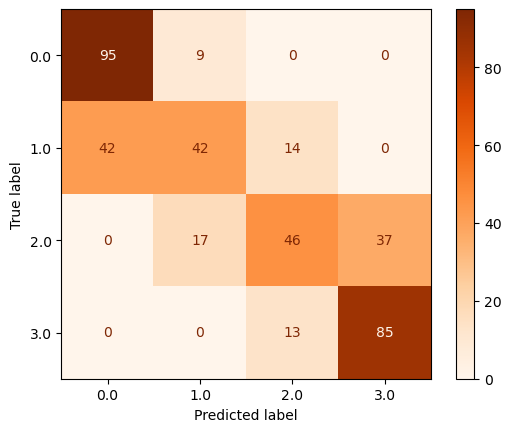

In [112]:
ConfusionMatrixDisplay.from_predictions(actual_values,predicted_values,cmap="Oranges")

In [113]:
print(classification_report(actual_values,predicted_values))

              precision    recall  f1-score   support

         0.0       0.69      0.91      0.79       104
         1.0       0.62      0.43      0.51        98
         2.0       0.63      0.46      0.53       100
         3.0       0.70      0.87      0.77        98

    accuracy                           0.67       400
   macro avg       0.66      0.67      0.65       400
weighted avg       0.66      0.67      0.65       400



-1.7763568394002506e-16